# Logistic Regression for for text classification

Word2vec + logistic regression for spam detection 

In [932]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from tqdm import tqdm

In [933]:
!gdown 1yacgNpDCFREwRe0qiOpTyoik2Jz_z-fu  # data_train.csv
!gdown 1yt9p3Syey65CnNJugcFZsNrOGELBd3LS  # data_scoring.csv

Downloading...
From: https://drive.google.com/uc?id=1yacgNpDCFREwRe0qiOpTyoik2Jz_z-fu
To: /content/data_train.csv
100% 34.7k/34.7k [00:00<00:00, 62.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yt9p3Syey65CnNJugcFZsNrOGELBd3LS
To: /content/data_scoring.csv
100% 424k/424k [00:00<00:00, 148MB/s]


In [934]:
data = pd.read_csv('data_train.csv')
data.head()

,Category,Message
0,ham,TODAY is Sorry day.! If ever i was angry with ...
1,ham,I.ll give her once i have it. Plus she said gr...
2,ham,Where is it. Is there any opening for mca.
3,ham,K:)k:)what are detail you want to transfer?acc...
4,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."


<Axes: >

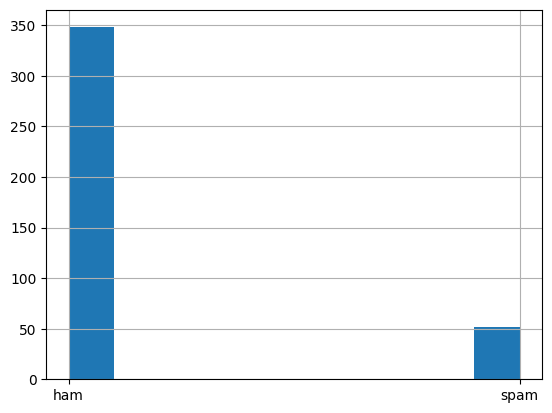

In [935]:
data["Category"].hist() #we have very imbalanced dataset 

In [936]:
data.shape

(400, 2)

In [937]:
data.replace("ham", 0, inplace = True)
data.replace("spam", 1 ,inplace = True)

In [938]:
y = data["Category"]
x = data["Message"]

Preprocessing

In [939]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [940]:
from nltk.tokenize import word_tokenize

In [941]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\w+")

In [942]:
tokens = [list(filter(str.isalpha,word_tokenize(text.lower()))) for text in tqdm(x)]

100%|██████████| 400/400 [00:00<00:00, 4373.30it/s]


In [943]:
from nltk.corpus import stopwords

stopword = stopwords.words('english') 
x = [[item for item in array if item not in stopword] for array in tqdm(tokens)]


100%|██████████| 400/400 [00:00<00:00, 22101.75it/s]


In [944]:
x

[['today',
  'sorry',
  'ever',
  'angry',
  'ever',
  'misbehaved',
  'hurt',
  'plz',
  'plz',
  'slap',
  'urself',
  'bcoz',
  'ur',
  'fault',
  'basically',
  'good'],
 ['give', 'plus', 'said', 'grinule', 'greet', 'whenever', 'speak'],
 ['opening', 'mca'],
 ['k', 'k', 'detail', 'want', 'transfer', 'acc', 'enough'],
 ['wen',
  'ur',
  'lovable',
  'bcums',
  'angry',
  'wid',
  'u',
  'dnt',
  'take',
  'seriously',
  'coz',
  'angry',
  'childish',
  'n',
  'true',
  'way',
  'showing',
  'deep',
  'affection',
  'care',
  'n',
  'luv',
  'kettoda',
  'manda',
  'nice',
  'day',
  'da'],
 ['sir', 'need', 'axis', 'bank', 'account', 'bank', 'address'],
 ['lets', 'use', 'next', 'week', 'princess'],
 ['awesome', 'think', 'get', 'usf', 'time', 'tonight'],
 ['still', 'grinder'],
 ['ok',
  'give',
  'minutes',
  'think',
  'see',
  'btw',
  'alibi',
  'cutting',
  'hair',
  'whole',
  'time'],
 ['im',
  'gonnamissu',
  'much',
  'would',
  'say',
  'il',
  'send',
  'u',
  'postcard',
 

In [945]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
#x = [" ".join([lemmatizer.lemmatize(word) for word in array]) for array in tqdm(x)]
x = [[lemmatizer.lemmatize(word) for word in array] for array in tqdm(x)]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 400/400 [00:00<00:00, 15842.66it/s]


In [946]:
x 

[['today',
  'sorry',
  'ever',
  'angry',
  'ever',
  'misbehaved',
  'hurt',
  'plz',
  'plz',
  'slap',
  'urself',
  'bcoz',
  'ur',
  'fault',
  'basically',
  'good'],
 ['give', 'plus', 'said', 'grinule', 'greet', 'whenever', 'speak'],
 ['opening', 'mca'],
 ['k', 'k', 'detail', 'want', 'transfer', 'acc', 'enough'],
 ['wen',
  'ur',
  'lovable',
  'bcums',
  'angry',
  'wid',
  'u',
  'dnt',
  'take',
  'seriously',
  'coz',
  'angry',
  'childish',
  'n',
  'true',
  'way',
  'showing',
  'deep',
  'affection',
  'care',
  'n',
  'luv',
  'kettoda',
  'manda',
  'nice',
  'day',
  'da'],
 ['sir', 'need', 'axis', 'bank', 'account', 'bank', 'address'],
 ['let', 'use', 'next', 'week', 'princess'],
 ['awesome', 'think', 'get', 'usf', 'time', 'tonight'],
 ['still', 'grinder'],
 ['ok',
  'give',
  'minute',
  'think',
  'see',
  'btw',
  'alibi',
  'cutting',
  'hair',
  'whole',
  'time'],
 ['im',
  'gonnamissu',
  'much',
  'would',
  'say',
  'il',
  'send',
  'u',
  'postcard',
  '

In [947]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size  = 0.3)


In [948]:
y_train = y_train.values
y_test = y_test.values

In [949]:
x_train

[['camera',
  'awarded',
  'sipix',
  'digital',
  'camera',
  'call',
  'fromm',
  'landline',
  'delivery',
  'within',
  'day'],
 ['bbq', 'sat', 'mine', 'ur', 'welcome', 'come'],
 ['lol', 'would', 'awesome', 'payback'],
 ['awesome', 'think', 'get', 'usf', 'time', 'tonight'],
 ['urgent',
  'trying',
  'contact',
  'last',
  'weekend',
  'draw',
  'show',
  'prize',
  'guaranteed',
  'call',
  'claim',
  'code',
  'valid'],
 ['polyphonic',
  'tone',
  'ur',
  'mob',
  'every',
  'week',
  'txt',
  'tone',
  'free',
  'get',
  'txtin',
  'tell',
  'ur',
  'friend',
  'reply',
  'hl'],
 ['give',
  'flying',
  'monkey',
  'wot',
  'think',
  'certainly',
  'mind',
  'friend',
  'mine'],
 ['captain', 'vijaykanth', 'comedy', 'captain', 'tv', 'drunken'],
 ['sexy',
  'st',
  'george',
  'day',
  'pic',
  'jordan',
  'txt',
  'pic',
  'dont',
  'miss',
  'every',
  'wk',
  'saucy',
  'celeb',
  'pic',
  'c'],
 ['guy', 'flash', 'go', 'call', 'call', 'madam', 'take', 'care', 'oh'],
 ['nice', 'n

Word2vec using gensim

In [950]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [951]:
import gensim

In [952]:
from gensim.models.word2vec import Word2Vec


model = Word2Vec(vector_size=100, window=2, min_count=3, workers=1)


model.build_vocab(x)


model.train(x, total_examples=model.corpus_count, epochs=100)

(150767, 346000)

In [953]:
model.corpus_count

400

In [954]:
len(model.wv.key_to_index)

314

In [955]:
model.wv['sorry'][:10]

array([-0.06683941,  0.05965091,  0.00145191,  0.04812228, -0.01698646,
       -0.35197008,  0.10739081,  0.38726062, -0.17202824, -0.06856774],
      dtype=float32)

In [956]:
model.wv.most_similar('sorry')

[('sir', 0.9866319298744202),
 ('http', 0.9847192764282227),
 ('meeting', 0.9845900535583496),
 ('point', 0.9836573004722595),
 ('log', 0.9834221601486206),
 ('waiting', 0.9827495813369751),
 ('taking', 0.9820104241371155),
 ('nothing', 0.9815231561660767),
 ('normal', 0.9811080098152161),
 ('find', 0.9810227155685425)]

In [957]:
model.wv.key_to_index

{'u': 0,
 'call': 1,
 'get': 2,
 'ur': 3,
 'love': 4,
 'go': 5,
 'ok': 6,
 'day': 7,
 'need': 8,
 'lt': 9,
 'come': 10,
 'gt': 11,
 'know': 12,
 'today': 13,
 'pls': 14,
 'please': 15,
 'want': 16,
 'would': 17,
 'c': 18,
 'like': 19,
 'week': 20,
 'text': 21,
 'got': 22,
 'ü': 23,
 'take': 24,
 'tell': 25,
 'good': 26,
 'feel': 27,
 'send': 28,
 'later': 29,
 'home': 30,
 'free': 31,
 'n': 32,
 'thing': 33,
 'time': 34,
 'dear': 35,
 'way': 36,
 'going': 37,
 'every': 38,
 'tone': 39,
 'give': 40,
 'lor': 41,
 'back': 42,
 'new': 43,
 'dont': 44,
 'still': 45,
 'make': 46,
 'k': 47,
 'one': 48,
 'wait': 49,
 'ask': 50,
 'msg': 51,
 'wan': 52,
 'meet': 53,
 'r': 54,
 'oh': 55,
 'cash': 56,
 'mobile': 57,
 'pick': 58,
 'b': 59,
 'see': 60,
 'friend': 61,
 'sorry': 62,
 'txt': 63,
 'min': 64,
 'much': 65,
 'think': 66,
 'care': 67,
 'well': 68,
 'nice': 69,
 'im': 70,
 'amp': 71,
 'babe': 72,
 'e': 73,
 'stop': 74,
 'da': 75,
 'god': 76,
 'claim': 77,
 'life': 78,
 'reply': 79,
 'kiss': 

In [958]:
def vectorize_sum(message):
  try:
    message_vectors = np.stack([model.wv[word]  if word  in model.wv.key_to_index.keys() else np.zeros(model.vector_size) for word in message])
    #message_vectors = np.stack([model.mv[word] for word in message.split() if word not in stopword])
  except:
    print("No vector created")
    message_vectors = np.zeros((1,model.vector_size))
  features = (np.sum(message_vectors, axis = 0)) 
  print(features)
  return features

In [959]:
x_train_wv = np.stack([vectorize_sum(text) for text in x_train])
x_test_wv = np.stack([vectorize_sum(text) for text in x_test])

Выходные данные были обрезаны до нескольких последних строк (5000).
 -1.40370103e-04 -4.23550248e-01 -2.31996879e-01 -6.65144801e-01
 -5.51604666e-03 -4.70675737e-01 -1.55377448e-01 -2.41667211e-01
  5.97795725e-01 -9.20162499e-02 -2.80034035e-01 -2.64546692e-01
  6.86738268e-02  1.80231214e-01  3.17363858e-01 -1.99380443e-01
 -1.24370605e-01  5.60943410e-03 -1.69269487e-01  2.15849102e-01
  1.40343666e-01 -4.57410477e-02 -4.84678209e-01  2.64681280e-01
  2.25866307e-02  8.09795931e-02  1.16263554e-01 -2.65785903e-01
 -5.72112918e-01  1.37737971e-02  2.96587050e-01  3.95220459e-01
 -5.46079993e-01  4.99899954e-01 -2.61424422e-01  1.28065169e-01
  2.08101153e-01 -2.24071681e-01  3.51658076e-01  2.34261572e-01
 -4.05512601e-02 -2.91655064e-02 -4.00109828e-01  1.65805578e-01
  5.84271550e-02  2.17836164e-02 -4.76706177e-01  5.33348799e-01
 -3.84208187e-03  1.15258500e-01  2.97430176e-02  5.54701746e-01
  4.79039609e-01 -1.45897731e-01  4.92075622e-01  4.02034879e-01
 -2.33611017e-02  1.64

In [960]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [961]:
x_train_wv

array([[-1.17440594,  0.39912814,  0.04809512, ..., -0.88248695,
        -0.37568096, -0.5320271 ],
       [-0.32485996,  0.23944749, -0.14402009, ..., -0.47431338,
         0.48334445, -0.53962583],
       [-0.22060698,  0.11490206,  0.01039827, ..., -0.23087799,
         0.30285044, -0.26921932],
       ...,
       [-0.38984291,  0.25131397, -0.16588937, ..., -0.49053914,
         0.49524555, -0.49603102],
       [-0.28805603,  0.22596542, -0.08269732, ..., -0.46224754,
         0.42695536, -0.4898587 ],
       [-0.31928013,  0.16662069, -0.02863919, ..., -0.43916012,
         0.42073125, -0.39287695]])

In [962]:
x_test_wv

array([[-0.41945113,  0.57128284, -0.41945666, ..., -0.80858243,
         0.50869401, -0.5219854 ],
       [-0.14452727,  0.04553293,  0.02886884, ..., -0.24709481,
         0.11551407, -0.18923946],
       [-0.42049018,  0.30773434, -0.15191883, ..., -0.91036141,
         0.96961719, -1.03847218],
       ...,
       [-1.03625112,  0.50740851,  0.2483161 , ..., -1.4707858 ,
         1.51190425, -2.21181613],
       [-0.35787001,  0.08530731,  0.0292808 , ..., -0.77396414,
         0.3585094 , -0.72543845],
       [-0.46730674,  0.25050462, -0.0406529 , ..., -0.50130784,
         0.02077166, -0.46803337]])

In [963]:
wv_model = LogisticRegression().fit(x_train_wv,y_train)
model_predict = wv_model.predict(x_test_wv)

0.8333333333333333


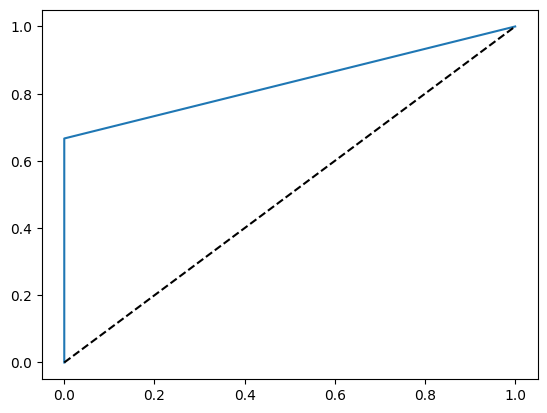

In [964]:
plt.plot(*roc_curve(y_test, model_predict)[:2])
plt.plot([0,1],[0,1],"--", color = "black")
print(roc_auc_score(y_test,model_predict))

We can see that roc_auc_score is 0.83  due to bad word2vec model, let's use prepared embeddings 

In [965]:
import gensim.downloader
embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

In [968]:
embeddings.word_vec("prize")

array([ 0.64007  ,  0.81998  , -0.23832  ,  0.20329  ,  1.7022   ,
       -0.53464  ,  0.7485   , -0.28659  , -0.54678  ,  0.081829 ,
       -0.096344 ,  0.6307   , -0.65055  , -0.30104  , -0.8936   ,
        0.37092  ,  0.4159   , -0.10681  ,  0.074159 ,  0.42476  ,
       -0.41108  , -0.63516  ,  0.2257   ,  0.062005 ,  1.3448   ,
       -0.19014  , -0.46088  , -0.23976  ,  1.3041   , -0.95736  ,
       -0.31833  ,  0.3267   , -0.51002  ,  0.4499   ,  0.057279 ,
       -0.33172  , -0.53608  ,  1.4868   , -1.2625   , -0.21592  ,
       -0.53321  , -0.0024826, -0.033647 , -0.56618  ,  0.46562  ,
       -0.17414  , -0.042216 , -0.97729  , -1.1886   ,  0.41801  ,
        0.40616  , -0.70466  ,  0.99403  ,  0.86512  , -0.76653  ,
       -1.4761   , -0.309    ,  0.45125  ,  0.62282  , -0.59236  ,
        0.24032  ,  1.0443   , -0.8091   , -0.073853 ,  0.78763  ,
       -0.5832   , -0.22171  ,  0.93234  ,  0.60423  ,  0.051707 ,
        0.19689  ,  0.35962  , -0.0040539,  0.42158  , -0.8335

In [969]:
def vect_sum(message):
  try: 
    message_vectors = np.stack([embeddings.word_vec(word) if word in embeddings.key_to_index.keys() else np.zeros(embeddings.vectors.shape[1]) for word in message])
    
  except:
    print("No vector created")
    message_vectors = np.zeros((1, embeddings.vectors.shape[1]))
  features = (np.sum(message_vectors, axis = 0))
  return features

In [970]:
x_train_wv = np.stack([vect_sum(text) for text in x_train])
x_test_wv = np.stack([vect_sum(text) for text in x_test])

No vector created


In [971]:
x_train_wv

array([[-5.89234024e-01, -4.49238032e-01, -1.93590030e-01, ...,
         7.01083021e-01,  4.01630302e+00,  1.03096701e+00],
       [-2.01455903e+00,  8.14633012e-01,  2.24328089e+00, ...,
        -1.60368204e+00,  2.22820902e+00,  8.15350056e-01],
       [ 3.70790018e-03,  7.79868007e-01,  9.84150052e-01, ...,
        -4.93183017e-01,  6.29019737e-02,  2.10016012e+00],
       ...,
       [ 1.28593588e+00,  7.77284980e-01,  2.61582232e+00, ...,
        -4.97999787e-03,  7.21090019e-01,  2.17025399e+00],
       [-2.70024967e+00,  2.65246391e+00,  3.62880015e+00, ...,
        -1.08214903e+00,  8.01569998e-01,  1.12337995e+00],
       [-5.43352008e-01,  1.24085999e+00,  7.73770034e-01, ...,
         7.64399946e-01,  1.92137003e+00,  5.52263975e-01]])

In [972]:
wv_model = LogisticRegression().fit(x_train_wv,y_train)
model_predict = wv_model.predict(x_test_wv)

In [920]:
model_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

0.8952380952380953


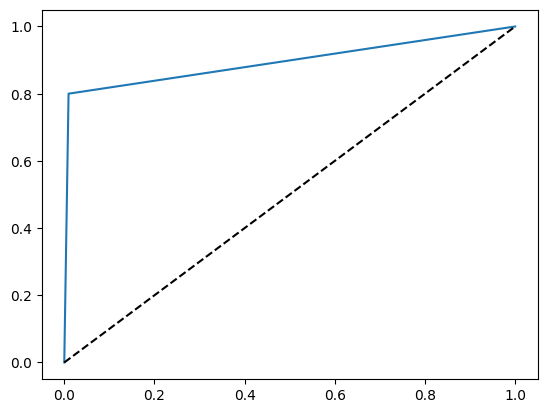

In [973]:
plt.plot(*roc_curve(y_test, model_predict)[:2])
plt.plot([0,1],[0,1],"--", color = "black")
print(roc_auc_score(y_test,model_predict))

Our model works better 

In [974]:
data_scoring = pd.read_csv('data_scoring.csv')
data_scoring.head()


,Message
0,"Hurry up, I've been weed-deficient for like th..."
1,Sounds like a plan! Cardiff is still here and ...
2,Is it your yahoo boys that bring in the perf? ...
3,"K, I'll work something out"
4,Hi im having the most relaxing time ever! we h...


In [975]:
x = data_scoring["Message"]

In [976]:
tokens = [list(filter(str.isalpha,word_tokenize(text.lower()))) for text in tqdm(x)]
from nltk.corpus import stopwords

stopword = stopwords.words('english') 
x = [[item for item in array if item not in stopword] for array in tqdm(tokens)]

100%|██████████| 5172/5172 [00:00<00:00, 35284.78it/s]


In [977]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
#x = [" ".join([lemmatizer.lemmatize(word) for word in array]) for array in tqdm(x)]
x = [[lemmatizer.lemmatize(word) for word in array] for array in tqdm(x)]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
100%|██████████| 5172/5172 [00:00<00:00, 28118.64it/s]


In [978]:
x_test_subm = np.stack([vect_sum(text) for text in x])

No vector created
No vector created
No vector created
No vector created
No vector created
No vector created
No vector created
No vector created
No vector created
No vector created
No vector created


In [979]:
model_predict = wv_model.predict(x_test_subm)

In [980]:
data_scoring["Prediction"] = model_predict

In [981]:
data_scoring.head()

,Message,Prediction
0,"Hurry up, I've been weed-deficient for like th...",0
1,Sounds like a plan! Cardiff is still here and ...,0
2,Is it your yahoo boys that bring in the perf? ...,1
3,"K, I'll work something out",0
4,Hi im having the most relaxing time ever! we h...,0


In [982]:
data_scoring["Prediction"].value_counts()

0    4541
1     631
Name: Prediction, dtype: int64

In [983]:
data_scoring[data_scoring["Prediction"] == 1]

,Message,Prediction
2,Is it your yahoo boys that bring in the perf? ...,1
8,Santa calling! Would your little ones like a c...,1
9,"If you don't, your prize will go to another cu...",1
16,URGENT! We are trying to contact U Todays draw...,1
26,"Dear Voucher Holder, To claim this weeks offer...",1
...,...,...
5136,We tried to contact you re your reply to our o...,1
5139,Plz note: if anyone calling from a mobile Co. ...,1
5142,Wylie update: my weed dealer carlos went to fr...,1
5158,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,1


This messages indeed look like spam